In [1]:
from datasets import PICNN_FNLVQR_Banana
import torch

In [2]:
synthetic_dataset = PICNN_FNLVQR_Banana()
X_train, y_train = synthetic_dataset.sample_joint(n_points=10**6)
tensor_dataset = torch.utils.data.TensorDataset(X_train, y_train)
dataloader = torch.utils.data.DataLoader(tensor_dataset, batch_size=1024)

In [3]:
from pushforward_operators import SchrodingerBridgeQuantile, IterativeMarkovianFittingParameters
from classes import TrainParameters

In [4]:
quantile = SchrodingerBridgeQuantile(
    feature_dimension=1,
    response_dimension=2,
    hidden_dimension=8,
    number_of_hidden_layers=2,
)

train_parameters = TrainParameters(
    number_of_epochs_to_train=10,
    optimizer_parameters=dict(
        lr=1e-1,
    ),
    scheduler_parameters=dict(
        eta_min=0
    ),
    verbose=True
)

iterative_markovian_fitting_parameters = IterativeMarkovianFittingParameters(
    number_of_training_iterations=10000,
    number_of_markovian_projections=10,
    noise_sigma_in_sde=0.1
)

In [5]:
_ = quantile.fit(
    dataloader=dataloader,
    train_parameters=train_parameters,
    iterative_markovian_fitting_parameters=iterative_markovian_fitting_parameters
)

IMF 1 [forward] step 10000, loss 2.4590, LR 0.000000: 100%|██████████| 10000/10000 [00:28<00:00, 354.72it/s]
IMF 1 [backward] step 10000, loss 0.3186, LR 0.000000: 100%|██████████| 10000/10000 [03:08<00:00, 53.19it/s]
IMF 2 [forward] step 10000, loss 0.2705, LR 0.000000: 100%|██████████| 10000/10000 [01:52<00:00, 89.19it/s]
IMF 2 [backward] step 10000, loss 0.3118, LR 0.000000: 100%|██████████| 10000/10000 [03:15<00:00, 51.11it/s]
IMF 3 [forward] step 10000, loss 0.2439, LR 0.000000: 100%|██████████| 10000/10000 [01:57<00:00, 85.43it/s]
IMF 3 [backward] step 10000, loss 0.2677, LR 0.000000: 100%|██████████| 10000/10000 [03:15<00:00, 51.04it/s]
IMF 4 [forward] step 10000, loss 0.4229, LR 0.000000: 100%|██████████| 10000/10000 [01:57<00:00, 85.45it/s]
IMF 4 [backward] step 10000, loss 0.4566, LR 0.000000: 100%|██████████| 10000/10000 [03:15<00:00, 51.07it/s]
IMF 5 [forward] step 10000, loss 0.1863, LR 0.000000: 100%|██████████| 10000/10000 [01:57<00:00, 85.29it/s]
IMF 5 [backward] step 1

In [6]:
path_for_models_weights = "../attic/models/schrodinger_bridge/schrodinger_bridge_picnn_banana.pth"
quantile.save(path=path_for_models_weights)
# quantile = SchrodingerBridgeQuantile.load_class(path=path_for_models_weights).eval()

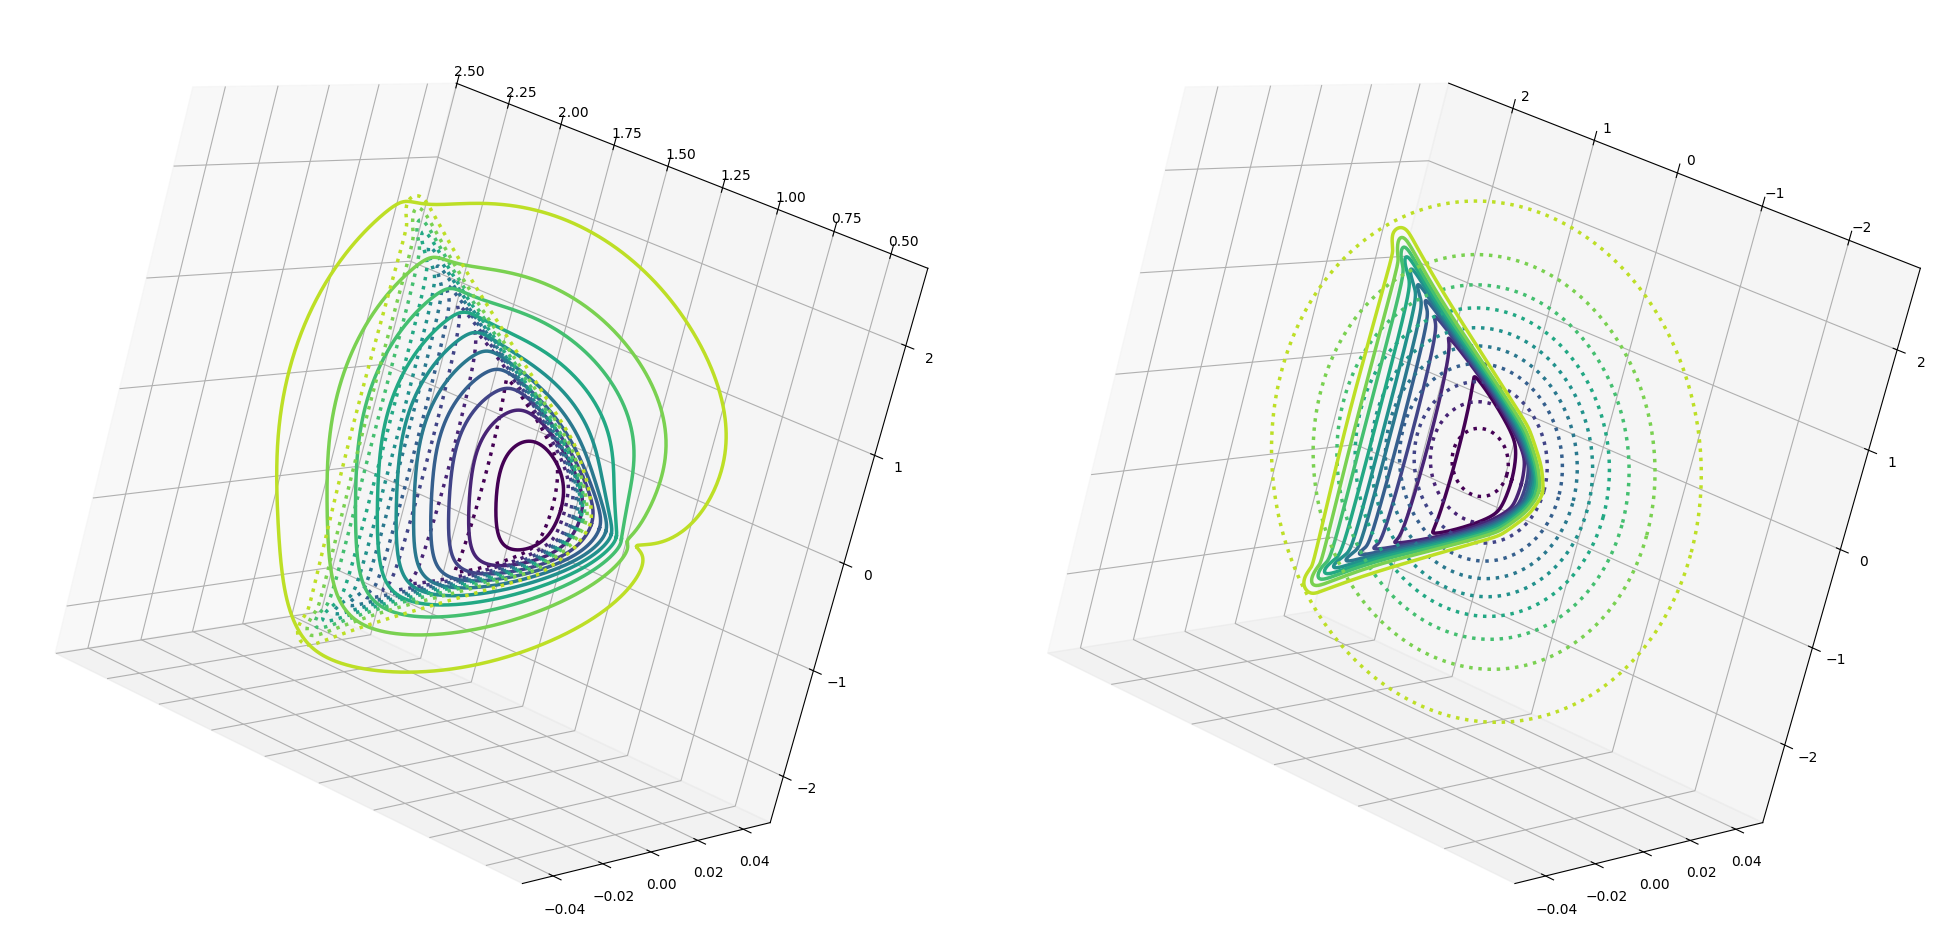

In [7]:
from utils.plot import plot_quantile_levels_from_dataset

plot_quantile_levels_from_dataset(
    model=quantile, dataset=synthetic_dataset, conditional_value=torch.Tensor([[1.5]]),
    number_of_quantile_levels=10, tensor_parameters={}
)

In [ ]:
 d